

https://machinelearningmastery.com/standard-machine-learning-datasets/

The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

1. Variance of Wavelet Transformed image (continuous).
2. Skewness of Wavelet Transformed image (continuous).
3. Kurtosis of Wavelet Transformed image (continuous).
4. Entropy of image (continuous).
5. Class (0 for authentic, 1 for inauthentic).



In [1]:
#Loading libraries
library(rpart,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(caret,quietly = TRUE)
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [2]:
#find.package('caret')
#install.packages('rpart')
#install.packages("rpart.plot")
#install.packages('rattle')

In [3]:
#Reading the data set as a dataframe
df <- read.csv ("https://raw.githubusercontent.com/Ramesh-Bhutka/decision--tree/main/BankNote_Authentication.csv")

In [4]:
str(df)

'data.frame':	1372 obs. of  5 variables:
 $ variance: num  3.622 4.546 3.866 3.457 0.329 ...
 $ skewness: num  8.67 8.17 -2.64 9.52 -4.46 ...
 $ curtosis: num  -2.81 -2.46 1.92 -4.01 4.57 ...
 $ entropy : num  -0.447 -1.462 0.106 -3.594 -0.989 ...
 $ class   : int  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
# number of rows with missing values
nrow(df) - sum(complete.cases(df))

[1] 0

In [6]:
head(df)

,variance,skewness,curtosis,entropy,class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3.62160,8.6661,-2.8073,-0.44699,0
2,4.54590,8.1674,-2.4586,-1.46210,0
3,3.86600,-2.6383,1.9242,0.10645,0
4,3.45660,9.5228,-4.0112,-3.59440,0
5,0.32924,-4.4552,4.5718,-0.98880,0
6,4.36840,9.6718,-3.9606,-3.16250,0


In [7]:
# analyzing the class  variable
table(df$class,df$class)

   
      0   1
  0 762   0
  1   0 610

In [8]:
nrow(df)

[1] 1372

In [9]:
#set seed to ensure reproducible results
set.seed(250)
#spliting into training and test data sets in 3:1 ratio
df[,'train'] <- ifelse(runif(nrow(df))<0.75,1,0)
#separate training and test sets
train_df <- df[df$train==1,]
test_df <- df[df$train==0,]
#get column index of train flag
df_trainColNum <- grep('train',names(train_df))

In [10]:
str(train_df)

'data.frame':	1031 obs. of  6 variables:
 $ variance: num  3.62 3.87 2.09 3.2 1.22 ...
 $ skewness: num  8.67 -2.64 -6.81 5.76 8.78 ...
 $ curtosis: num  -2.807 1.924 8.464 -0.753 -2.213 ...
 $ entropy : num  -0.447 0.106 -0.602 -0.613 -0.806 ...
 $ class   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ train   : num  1 1 1 1 1 1 1 1 1 1 ...


In [11]:
str(test_df)

'data.frame':	341 obs. of  6 variables:
 $ variance: num  4.546 3.457 0.329 4.368 3.591 ...
 $ skewness: num  8.17 9.52 -4.46 9.67 3.01 ...
 $ curtosis: num  -2.459 -4.011 4.572 -3.961 0.729 ...
 $ entropy : num  -1.462 -3.594 -0.989 -3.163 0.564 ...
 $ class   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ train   : num  0 0 0 0 0 0 0 0 0 0 ...


In [12]:
number.perfect.splits <- apply(X=df[-1], MARGIN = 2, FUN = function(col){
t <- table(df$class,col)
sum(t == 0)
})

In [13]:
# Descending order of perfect splits
order <- order(number.perfect.splits,decreasing = TRUE)
number.perfect.splits <- number.perfect.splits[order]

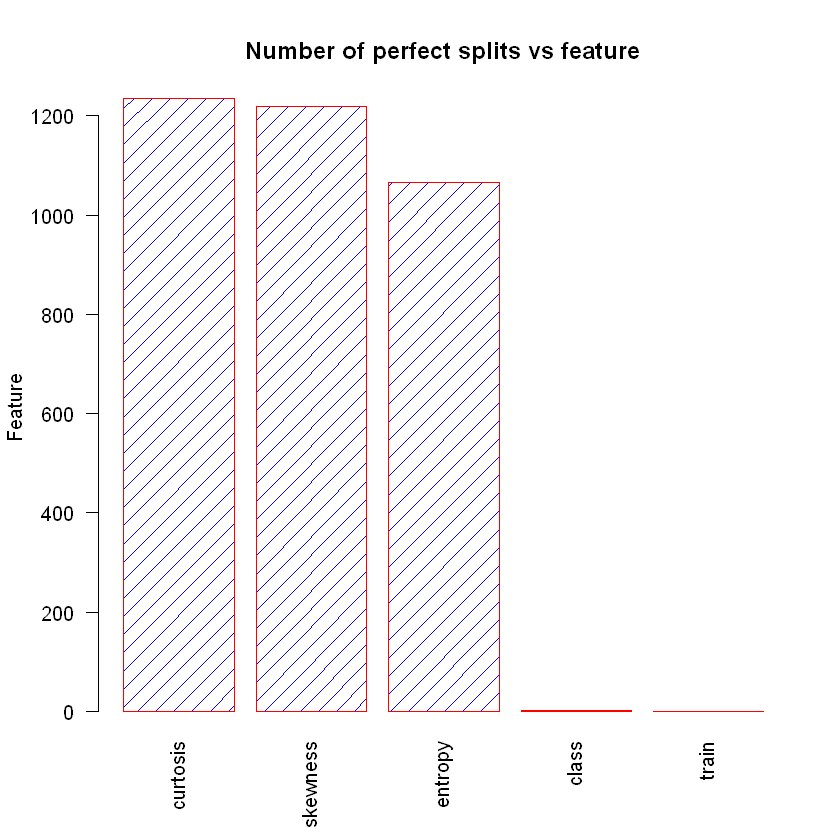

In [14]:
# Plot graph
#par(mar=c(10,2,2,2))
barplot(number.perfect.splits,main="Number of perfect splits vs feature",
xlab="",ylab="Feature",las=2,border="red",col="blue",density=10)

In [15]:
#data splicing
set.seed(12345)
train <- sample(1:nrow(df),size = ceiling(0.80*nrow(df)),replace = FALSE)
# training set
df_train <- df[train,]
# test set
df_test <- df[-train,]

In [16]:
# building the classification tree with rpart
tree <- rpart(class~.,data=df_train, method = "class")

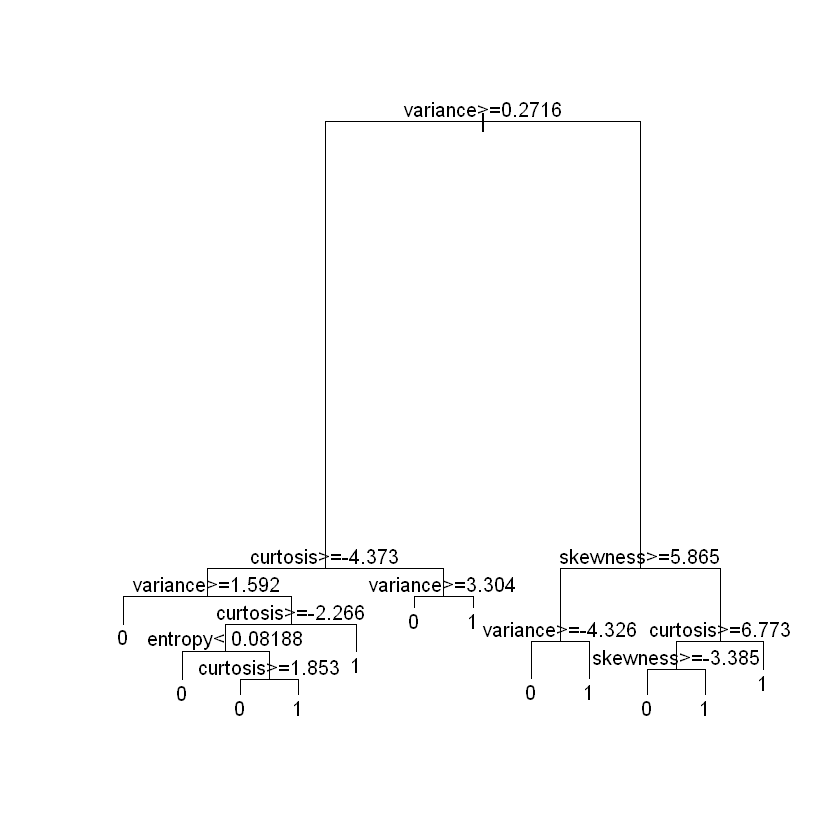

In [17]:
#Obtaining the train and test data set
#remove train flag column from train and test sets
train_df <- train_df[,-df_trainColNum]
test_df <- test_df[,-df_trainColNum]
#Get column index of predicted variable in dataset
typeColNum_df <- grep('class',names(df))
#Constructing the required Decision tree model
rpart_model_df <- rpart(class~.,data = train_df, method= 'class')
# Plotting the tree
plot(rpart_model_df)
text(rpart_model_df)

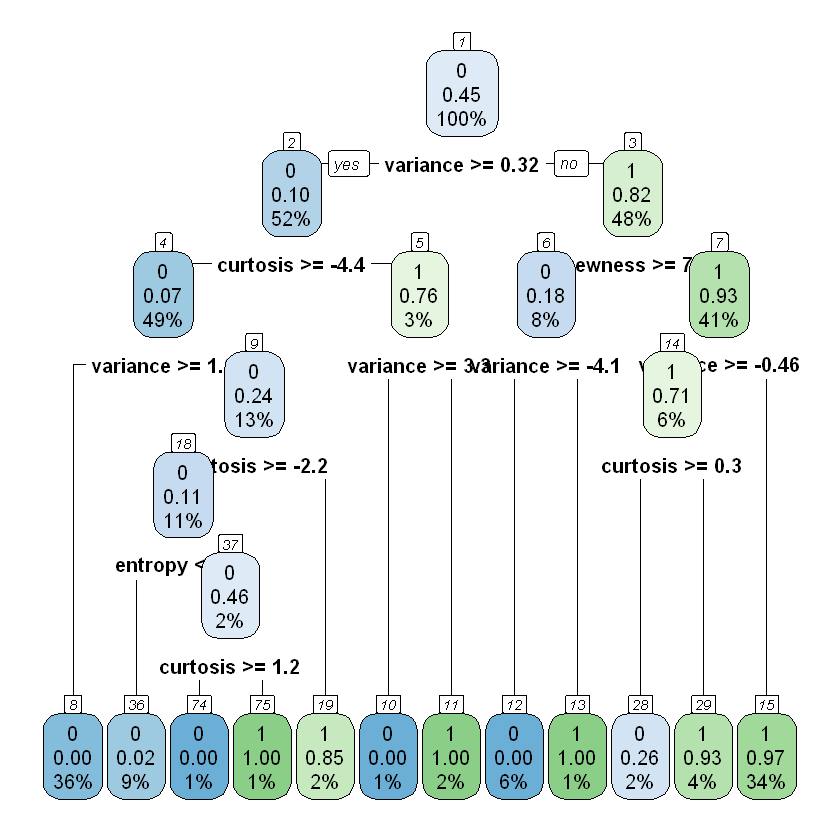

In [18]:
# Visualize the decision tree with rpart.plot
rpart.plot(tree, nn=TRUE, cex=1, box.palette = "auto")

In [19]:
#There are three level in the class variable, 1 as setosa and 2 as versicolor
#3 as Virginica
v<-df$class
table(v)

v
  0   1 
762 610 

In [20]:
"""
#set seed to ensure reproducible results
set.seed(250)
#spliting into training and test data sets in 3:1 ratio
df[,'train'] <- ifelse(runif(nrow(df))<0.75,1,0)
#separate training and test sets
train_df <- df[df$train==1,]
test_df <- df[df$train==0,]
#get column index of train flag
df_trainColNum <- grep('train',names(train_df))

str(test_df)
"""

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected string constant
12: str(test_df)
13: "
      ^


In [21]:
summary(rpart_model_df)

Call:
rpart(formula = class ~ ., data = train_df, method = "class")
  n= 1031 

          CP nsplit  rel error     xerror       xstd
1 0.66375546      0 1.00000000 1.00000000 0.03483495
2 0.10917031      1 0.33624454 0.36026201 0.02570432
3 0.05458515      2 0.22707424 0.24672489 0.02190109
4 0.03711790      3 0.17248908 0.19432314 0.01968909
5 0.01855895      4 0.13537118 0.16157205 0.01809577
6 0.01746725      8 0.06113537 0.12445415 0.01602220
7 0.01091703      9 0.04366812 0.07641921 0.01269606
8 0.01000000     11 0.02183406 0.06986900 0.01215802

Variable importance
variance skewness curtosis  entropy 
      47       25       17       11 

Node number 1: 1031 observations,    complexity param=0.6637555
  predicted class=0  expected loss=0.4442289  P(node) =1
    class counts:   573   458
   probabilities: 0.556 0.444 
  left son=2 (539 obs) right son=3 (492 obs)
  Primary splits:
      variance < 0.27164   to the right, improve=250.363100, (0 missing)
      skewness < 4.99835   to

In [23]:
#Checking how good the model is
rpart_predict_df<- predict(rpart_model_df,test_df[,-typeColNum_df],type='class')
mn_df <- mean(rpart_predict_df==test_df$class)
mn_df

[1] 0.9765396

In [27]:
# Constructing the confusion matrix to find out the efficiency of the model
table(pred=rpart_predict_df,true=test_df$class)

    true
pred   0   1
   0 184   3
   1   5 149

In [28]:
# Constructing the confusion matrix to find out the efficiency of the model
t <- table(test_df$class,rpart_predict_df)

In [29]:
#install.packages('e1071', dependencies=TRUE)
confusionMatrix(t)

Confusion Matrix and Statistics

   rpart_predict_df
      0   1
  0 184   5
  1   3 149
                                          
               Accuracy : 0.9765          
                 95% CI : (0.9543, 0.9898)
    No Information Rate : 0.5484          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9526          
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.9840          
            Specificity : 0.9675          
         Pos Pred Value : 0.9735          
         Neg Pred Value : 0.9803          
             Prevalence : 0.5484          
         Detection Rate : 0.5396          
   Detection Prevalence : 0.5543          
      Balanced Accuracy : 0.9757          
                                          
       'Positive' Class : 0               
                                          